In [1]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
from IPython.display import display, HTML
import seaborn as sns
import random
import matplotlib.pyplot as plt
import plotly.express as px
import pandas_profiling as pp
from scipy import stats
from scipy.stats import norm
from sklearn.preprocessing import MinMaxScaler
%matplotlib inline
from sklearn.impute import SimpleImputer

In [2]:
data= pd.read_csv('../DataSets/Inferring_AQI_Trends/AQI_Bangalore_Jan-May_2023.csv')

In [3]:
def eda(df):
    print("==================================================================")
    print("1. Dataframe Shape: ",df.shape)
    print("==================================================================")
    print("2. Explore the Data: ")
    display(HTML(df.head(5).to_html()))
    print("==================================================================")
    print("3. Information on the Data: ")
    data_info_df                      = pd.DataFrame(df.dtypes, columns=['data type'])
    data_info_df['Duplicated_Values'] = df.duplicated().sum()
    data_info_df['Missing_Values']    = df.isnull().sum().values
    data_info_df['%Missing']          = df.isnull().sum().values / len(df)* 100
    data_info_df['Unique_Values']     = df.nunique().values
    df_desc                           = df.describe(include='all').transpose()
    data_info_df['Count']             = df_desc['count'].values
    data_info_df['Mean']              = df_desc['mean'].values
    data_info_df['STD']               = df_desc['std'].values
    data_info_df['Min']               = df_desc['min'].values
    data_info_df['Max']               = df_desc['max'].values
    data_info_df                      = data_info_df[['Count','Mean','STD', 'Min', 'Max','Duplicated_Values','Missing_Values',
                                                      '%Missing','Unique_Values']]
    display(HTML(data_info_df.to_html()))
    print("==================================================================")
    print("4. Correlation Matrix Heatmap - For Numeric Variables:")
    num_cols = df.select_dtypes(include = ['float64']).columns.tolist()
    correlation_matrix = df[num_cols].corr()
    plt.figure(figsize=(12, 8))
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5, fmt='.2f')
    plt.show()
    print("==================================================================")
    print("6. Distribution of Numerical Variables")
    for col in num_cols:
        sns.histplot(df[col], kde=True)
        plt.xlabel(col)
        plt.ylabel('Frequency')
        plt.title('Distribution of {}'.format(col))
        plt.show()
    print("==================================================================")

1. Dataframe Shape:  (135, 12)
2. Explore the Data: 


,Unnamed: 0,Date,NO2(ug/m3),SO2(ug/m3),CO(mg/m3),PM10(ug/m3),TEMP(degreeC),HR(%),WS(m/s),WD(degree),SR(W/m2),AQI
0,0,2023-01-01,36.9,5.0,0.53,134.6,29.4,77.7,0.65,147.4,285.1,62.893254
1,1,2023-01-02,36.5,3.5,0.28,91.4,30.7,58.4,0.55,160.9,168.0,74.124968
2,2,2023-01-03,28.7,2.1,0.60,55.8,24.1,45.1,0.86,277.1,274.1,74.632000
3,3,2023-01-04,17.2,6.8,0.30,116.3,24.9,52.7,0.40,180.9,255.6,109.132437
4,4,2023-01-05,23.1,7.0,0.16,46.1,33.6,29.2,0.10,231.2,280.7,144.292485


3. Information on the Data: 


,Count,Mean,STD,Min,Max,Duplicated_Values,Missing_Values,%Missing,Unique_Values
Unnamed: 0,135.0,67.0,39.115214,0.0,134.0,0,0,0.0,135
Date,135,NaN,NaN,NaN,NaN,0,0,0.0,135
NO2(ug/m3),135.0,27.519259,7.102548,16.0,39.8,0,0,0.0,96
SO2(ug/m3),135.0,5.014074,1.817829,2.0,7.9,0,0,0.0,55
CO(mg/m3),135.0,0.578741,0.257457,0.01,0.99,0,0,0.0,71
PM10(ug/m3),135.0,94.6,26.679698,45.5,139.3,0,0,0.0,124
TEMP(degreeC),135.0,28.905926,3.090012,24.0,33.9,0,0,0.0,72
HR(%),135.0,51.394815,15.603087,25.1,80.8,0,0,0.0,121
WS(m/s),135.0,0.517704,0.256451,0.1,0.99,0,0,0.0,71
WD(degree),135.0,190.642222,55.787596,103.4,282.5,0,0,0.0,129


4. Correlation Matrix Heatmap - For Numeric Variables:


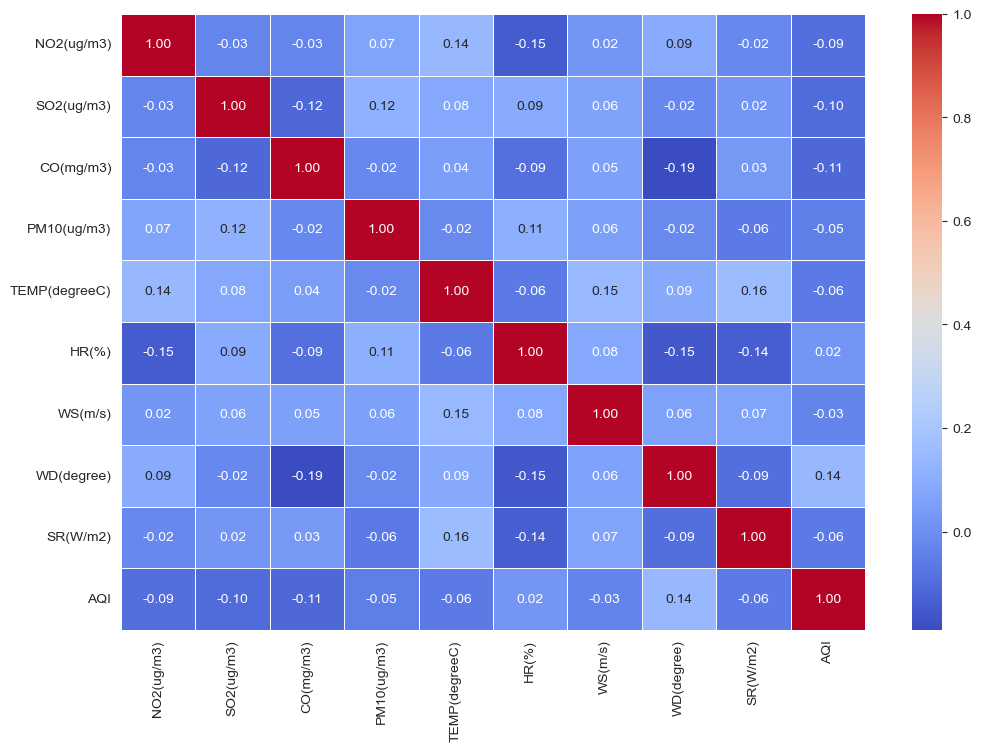

6. Distribution of Numerical Variables


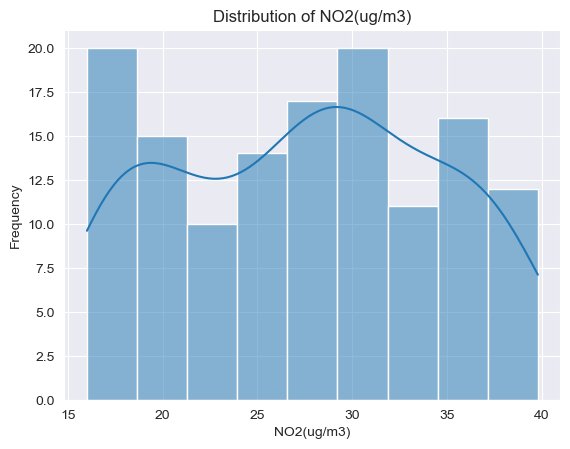

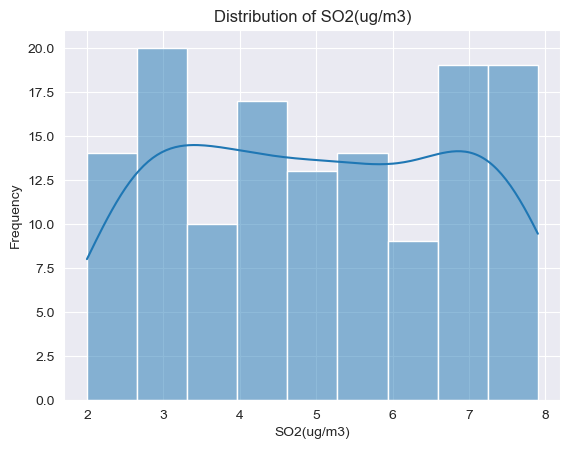

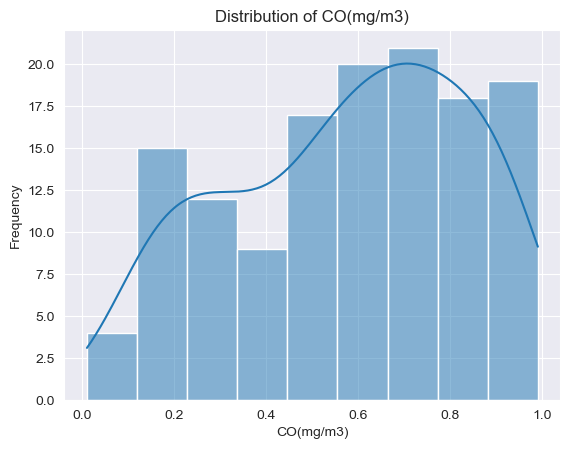

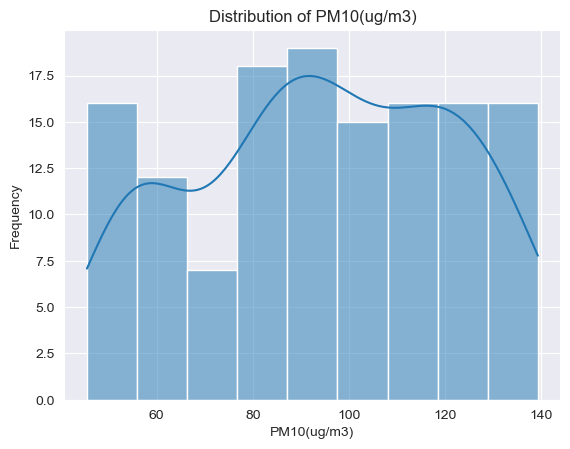

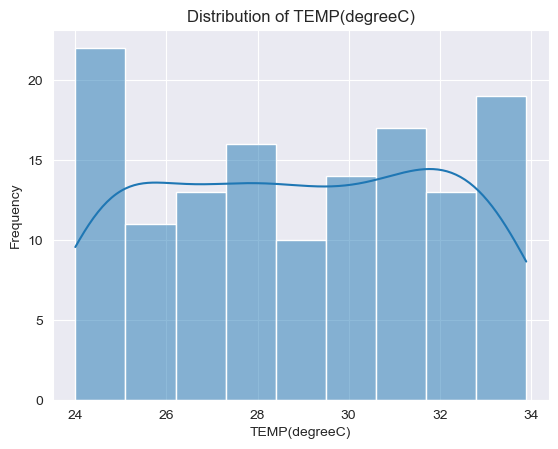

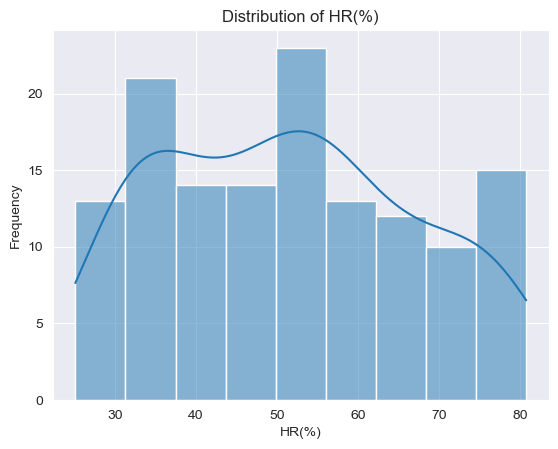

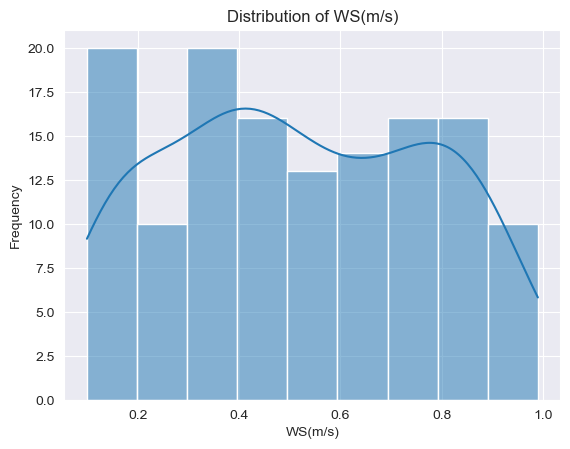

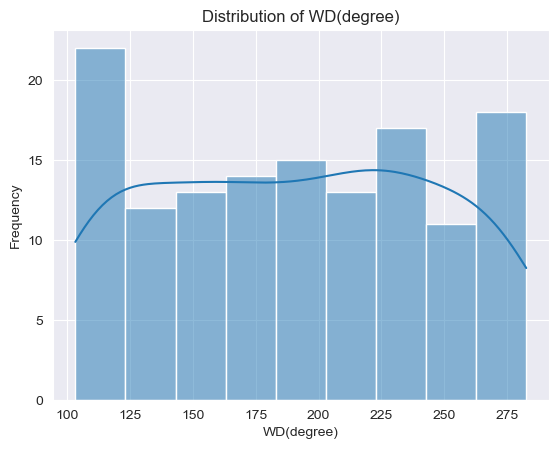

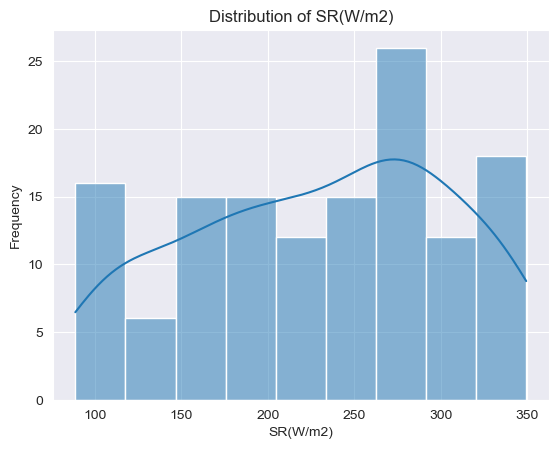

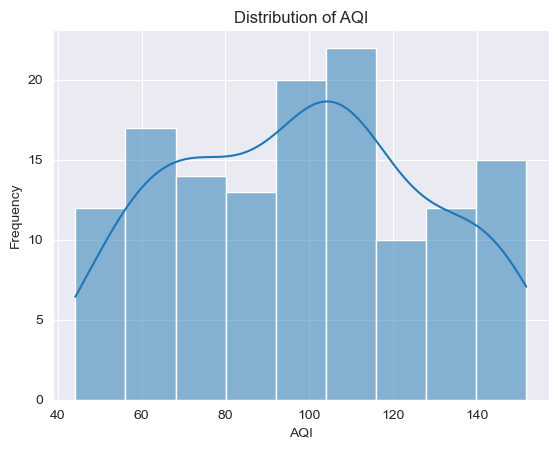

In [4]:
eda(data)